# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)
x_estirado = x**2
y = np.array([0, 0.9,7,18,25,39,51,67,78,89])

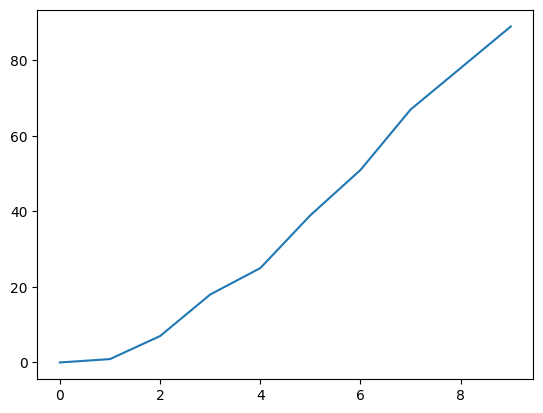

In [7]:
plt.plot(x,y)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

predictions = lm.predict

In [9]:
X = df[['YearsExperience']]
y = df['Salary']

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.score(X,y)

0.9569566641435086

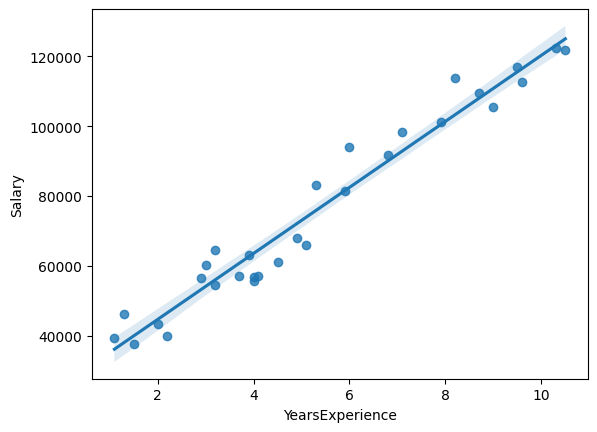

In [13]:
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [14]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [13]:
lin_reg.score(X,y)

0.6690412331929895

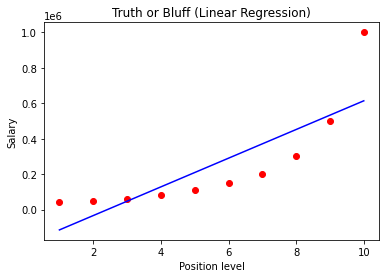

In [14]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


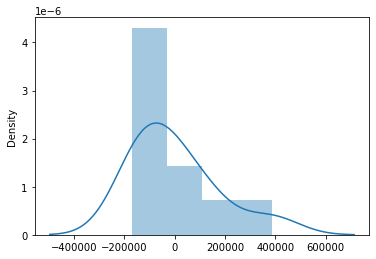

In [15]:
sns.distplot(y - lin_reg.predict(X));

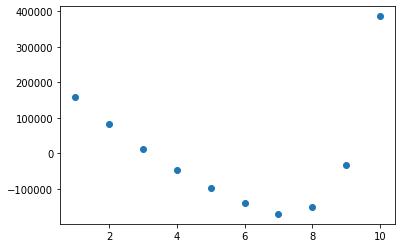

In [19]:
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
feats = pd.DataFrame({"a": [1,2,3,4,5,6,7], "b":[10, 20, 30 ,40 , 50, 60, 70]})

In [17]:
poly_feats = PolynomialFeatures(degree = 3)#Hiperparámetro
poly_feats.fit(feats)
pd.DataFrame(poly_feats.transform(feats))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,10.0,1.0,10.0,100.0,1.0,10.0,100.0,1000.0
1,1.0,2.0,20.0,4.0,40.0,400.0,8.0,80.0,800.0,8000.0
2,1.0,3.0,30.0,9.0,90.0,900.0,27.0,270.0,2700.0,27000.0
3,1.0,4.0,40.0,16.0,160.0,1600.0,64.0,640.0,6400.0,64000.0
4,1.0,5.0,50.0,25.0,250.0,2500.0,125.0,1250.0,12500.0,125000.0
5,1.0,6.0,60.0,36.0,360.0,3600.0,216.0,2160.0,21600.0,216000.0
6,1.0,7.0,70.0,49.0,490.0,4900.0,343.0,3430.0,34300.0,343000.0


In [18]:
feats

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70


In [16]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1, 10):
    poly_feats = PolynomialFeatures(degree = degree)
    poly_feats.fit(X)
    X_poly = poly_feats.transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    score = pol_reg.score(X_poly, y)
    print(f"Para el degree {degree}, el score es de: {score}")
    

Para el degree 1, el score es de: 0.9569566641435086
Para el degree 2, el score es de: 0.956975168321065
Para el degree 3, el score es de: 0.9635969766249463
Para el degree 4, el score es de: 0.9636560599375091
Para el degree 5, el score es de: 0.9665546834956733
Para el degree 6, el score es de: 0.9673693577169904
Para el degree 7, el score es de: 0.9722578921026807
Para el degree 8, el score es de: 0.9728154307146336
Para el degree 9, el score es de: 0.9732969097555526


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00,
        5.06250000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01],
       [1.00000000e+00, 2.20000000e+00, 4.84000000e+00, 1.06480000e+01,
        2.34256000e+01],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02],
       [1.00000000e+00, 3.70000000e+00, 1.36900000e+01, 5.06530000e+01,
        1.87416100e+02],
       [1.00000000e+00, 3.9000

In [22]:
X_poly2 = X_poly[:, 2:3]
X_poly2

array([[  1.21],
       [  1.69],
       [  2.25],
       [  4.  ],
       [  4.84],
       [  8.41],
       [  9.  ],
       [ 10.24],
       [ 10.24],
       [ 13.69],
       [ 15.21],
       [ 16.  ],
       [ 16.  ],
       [ 16.81],
       [ 20.25],
       [ 24.01],
       [ 26.01],
       [ 28.09],
       [ 34.81],
       [ 36.  ],
       [ 46.24],
       [ 50.41],
       [ 62.41],
       [ 67.24],
       [ 75.69],
       [ 81.  ],
       [ 90.25],
       [ 92.16],
       [106.09],
       [110.25]])

In [33]:
X_poly3 = X_poly[:,3:4]

In [26]:
X_poly4 = X_poly[:,4:5]

In [37]:
X_poly4

array([[1.000e+00],
       [1.600e+01],
       [8.100e+01],
       [2.560e+02],
       [6.250e+02],
       [1.296e+03],
       [2.401e+03],
       [4.096e+03],
       [6.561e+03],
       [1.000e+04]])

In [23]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [24]:
pol_reg.score(X_poly, y)

0.9636560599375091

`x^0 + x^1 + x^2 + x^3 + x^4 `

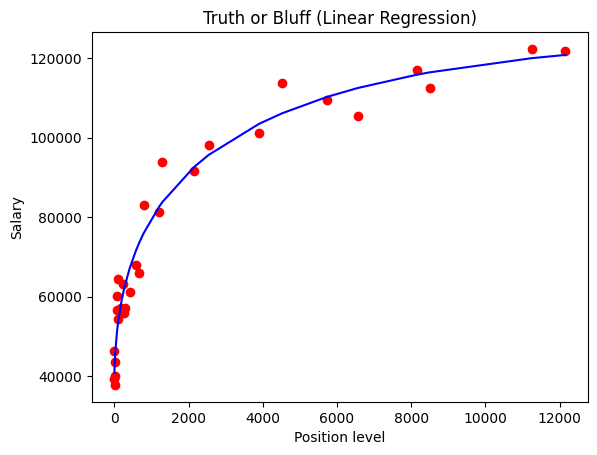

In [28]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_poly4, y, color='red')
    plt.plot(X_poly4, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [32]:
pol_reg.score(X_poly,y)

0.9812097727913367

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [49]:
print(lin_reg.predict([[7.3]]))

[395081.81818182]


In [50]:
print(pol_reg.predict(poly_feats.transform([[7.3]])))

[213110.8916084]


In [4]:
df = pd.read_csv('data/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

In [16]:
X_train

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [17]:
X_test

array([[1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [18]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = pol_reg.predict(X_test)

In [20]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])
df_preds['real_value'] = pd.Series(y_test)

df_preds

,predictions,real_value
0,548738.145307,500000
1,27337.436088,50000


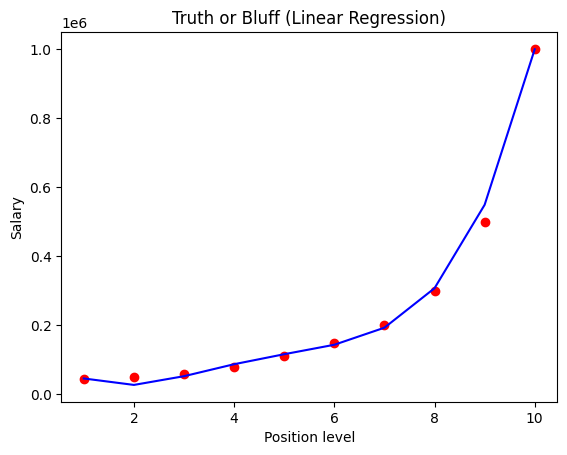

In [21]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [22]:
from sklearn.metrics import r2_score
r2_score(pol_reg.predict(X_test), y_test)

0.9787463221474783

In [ ]:
# TRANSFORMO LOS DATOS(estiramos)
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

#ENTRENO MODELO LINEAL
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

#
